In [73]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings

df = pd.read_csv('statement5b21828daec39bda8ed8dbf28f2189a4.csv')
warnings.simplefilter(action='ignore', category=FutureWarning)

pd.set_option('display.max_columns', None)
df['Close Date'] = pd.to_datetime(df['Close Date'])
date_limit = pd.to_datetime('2025-03-13')
df_filter = df[df['Close Date'] <= date_limit]
df_filter

,Tags,Ticket,Open Date,Close Date,Symbol,Action,Units/Lots,SL,TP,Open Price,Close Price,Commission,Swap,Pips,Profit,Gain,Comment,Magic Number,Duration (DD:HH:MM:SS),Profitable(%),Profitable(time duration),Drawdown,Risk:Reward,Max(pips),Max(EUR),Min(pips),Min(EUR),Entry Accuracy(%),Exit Accuracy(%),ProfitMissed(pips),ProfitMissed(EUR)
51,NaN,48397633,03/12/2025 22:19,2025-03-12 22:21:00,BTCUSD,Sell,0.3,0.0,82758.12,82931.00,82869.00,0.0,0.0,62.0,17.06,0.01,NaN,0,00:00:02:09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
52,NaN,48378953,03/12/2025 20:07,2025-03-12 20:54:00,XAUUSD,Sell,0.3,0.0,2936.69,2938.12,2937.64,0.0,0.0,48.0,13.20,0.01,NaN,0,00:00:47:20,100.0,47m,360.0,0.00,408.0,114.24,0.0,0.0,100.0,11.8,-360.0,-100.80
53,NaN,48376801,03/12/2025 19:56,2025-03-12 20:54:00,XAUUSD,Sell,0.3,0.0,2936.63,2935.72,2937.67,0.0,0.0,-195.0,-53.63,-0.03,NaN,0,00:00:58:36,60.4,35m,363.0,1.16,168.0,47.04,-195.0,-54.6,46.3,0.0,-363.0,-101.64
54,NaN,48384230,03/12/2025 20:45,2025-03-12 20:54:00,XAUUSD,Sell,0.3,0.0,2936.76,2939.98,2937.64,0.0,0.0,234.0,64.36,0.04,NaN,0,00:00:09:02,100.0,9m,325.0,0.00,559.0,156.52,0.0,0.0,100.0,41.9,-325.0,-91.00
55,NaN,48372097,03/12/2025 19:32,2025-03-12 19:45:00,XAUUSD,Sell,0.3,0.0,2933.82,2935.96,2934.66,0.0,0.0,130.0,35.75,0.02,NaN,0,00:00:13:08,7.7,1m,0.0,0.01,130.0,36.40,0.0,0.0,100.0,100.0,0.0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3987,NaN,14061626,08/01/2024 21:10,2024-08-01 21:11:00,BTCUSD,Buy,0.1,0.0,0.00,62907.00,62969.00,0.0,0.0,62.0,5.75,0.01,NaN,0,00:00:00:07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3988,NaN,14061624,08/01/2024 21:10,2024-08-01 21:11:00,BTCUSD,Buy,0.1,0.0,0.00,62906.00,62961.00,0.0,0.0,55.0,5.06,0.01,NaN,0,00:00:00:07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3989,NaN,14061622,08/01/2024 21:10,2024-08-01 21:10:00,BTCUSD,Buy,0.1,0.0,63013.33,62907.00,62988.00,0.0,0.0,81.0,7.50,0.01,NaN,0,00:00:00:07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3990,NaN,14055994,08/01/2024 20:24,2024-08-01 20:27:00,NAS100,Buy,1.0,0.0,19011.47,18999.00,19003.00,0.0,0.0,4.0,4.39,0.00,NaN,0,00:00:03:33,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [75]:
# Calculate Sharpe Ratio
df_filter.loc[:,'Open Date'] = pd.to_datetime(df_filter['Open Date'])
rets = df_filter.groupby(pd.Grouper(key='Open Date', freq='D'))['Gain'].sum().div(100)
sharpe = ((rets.mean())/rets.std())*np.sqrt(252)
float(sharpe)

10.369066420607709

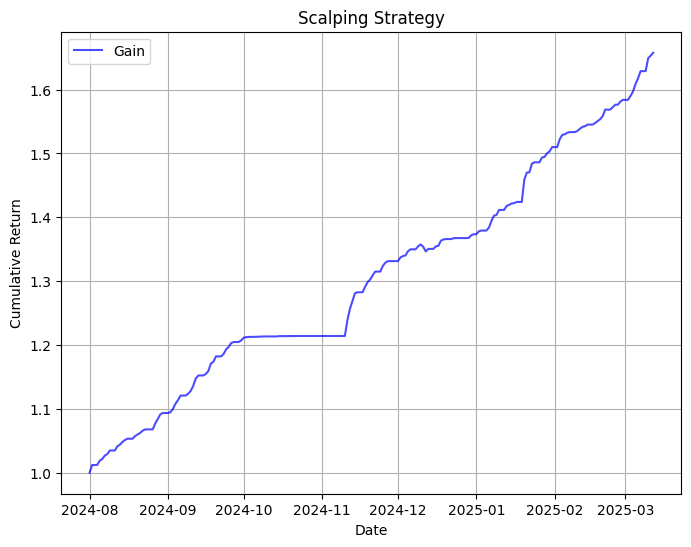

In [79]:
#Cumprod Chart
cumulative_rets = (1+rets).cumprod()

plt.figure(figsize=(8, 6))
plt.plot(cumulative_rets, label='Gain', color='blue', alpha=0.7)
plt.title('Scalping Strategy')
plt.xlabel('Date')
plt.ylabel('Cumulative Return')
plt.legend(loc='upper left')
plt.grid(True)
plt.show()

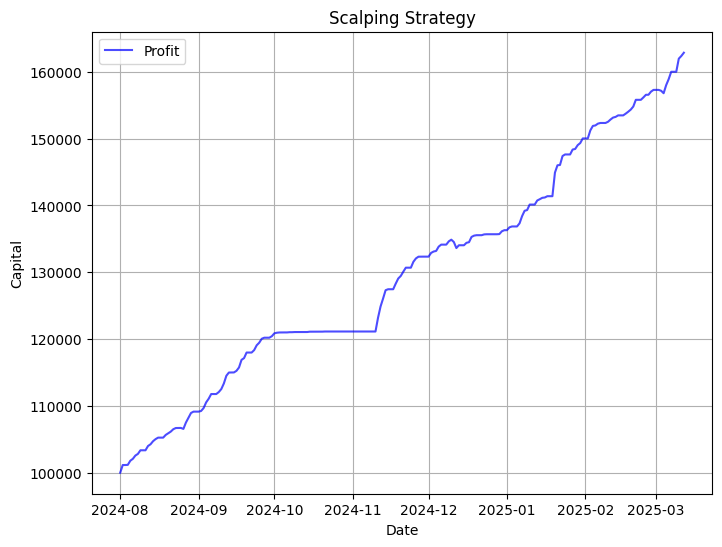

In [84]:
#Profit Chart
retsprofit = df_filter.groupby(pd.Grouper(key='Open Date', freq='D'))['Profit'].sum()

cumulativesum = retsprofit.cumsum()
initial_capital = 100000

portfolio_value = initial_capital + cumulativesum
plt.figure(figsize=(8, 6))
plt.plot(portfolio_value, label='Profit', color='blue', alpha=0.7)
plt.title('Scalping Strategy')
plt.xlabel('Date')
plt.ylabel('Capital')
plt.legend(loc='upper left')
plt.grid(True)
plt.show()